# **We start with --->**

## **1 - Importing Libraries**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## **2- Loading our dataset**

In [ ]:
# Load dataset
file_path = "/content/drive/MyDrive/kaggle_Interests_group.csv"  # Replace with your file path
dataset = pd.read_csv(file_path)

# **Second step is to --->**

  **- A simple resume of all what we have in the dataset**

In [30]:
#group by 'group' and calculate the sum of 'grand_tot_interests'
group_summary = dataset.groupby('group')['grand_tot_interests'].sum().reset_index()

#rename columns for clarity
group_summary.columns = ['Group', 'Total Interests']

#display the group summary table
print(group_summary)

  Group  Total Interests
0     C            61847
1     I            73749
2     P            61789
3     R            39175


**- Data Preprocessing & Visualisation**

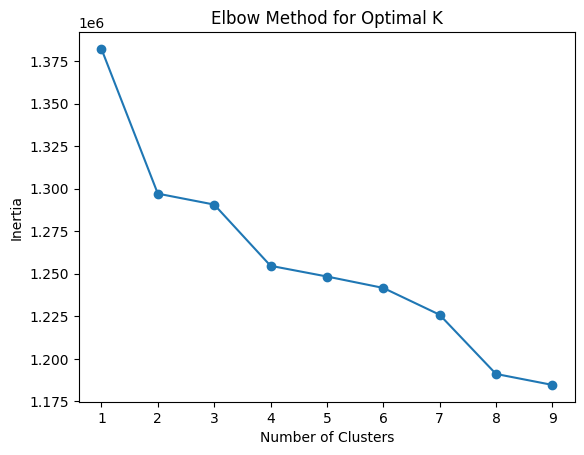

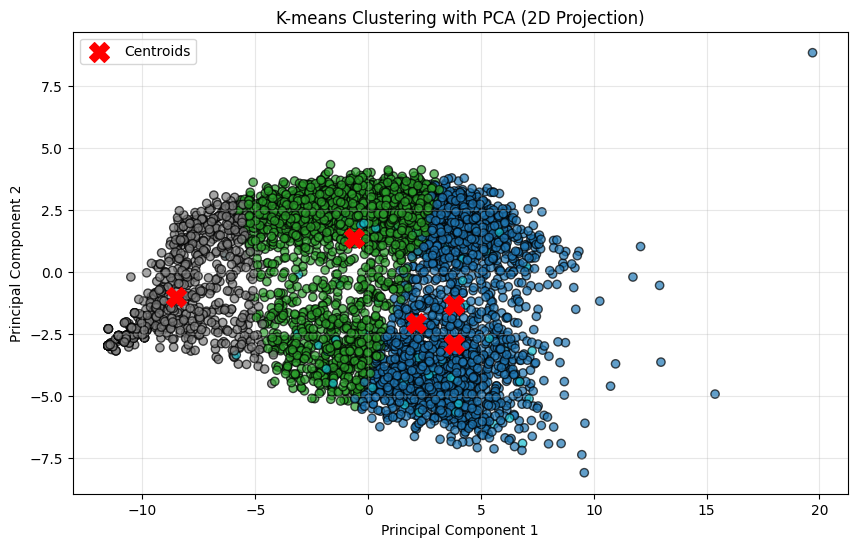

In [31]:
#data preprocessing
interest_columns = [col for col in dataset.columns if "interest" in col]
interests_data = dataset[interest_columns]
imputer = SimpleImputer(strategy="constant", fill_value=0)
interests_data_cleaned = imputer.fit_transform(interests_data)
scaler = StandardScaler()
interests_data_scaled = scaler.fit_transform(interests_data_cleaned)

print()
print()
print()

#determine optimal k using Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(interests_data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


print()
print()
print()

#K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(interests_data_scaled)

#adding a cluster labels to dataset
dataset["Cluster"] = clusters

#PCA for visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(interests_data_scaled)

#visualize clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    pca_data[:, 0], pca_data[:, 1],
    c=clusters, cmap='tab10', alpha=0.7, edgecolor='k'
)
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering with PCA (2D Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
